# ROC and Precision-Recall Curves
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

 Generate dataset and fit a model

In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

Calculate roc curve

AUC: 0.895


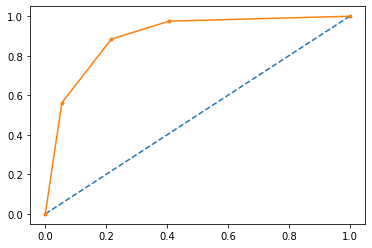

In [2]:
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

# show the plot
pyplot.show()

Precision-Recall curve

In [3]:
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)

# calculate F1 score
f1 = f1_score(testy, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')

# show the plot
pyplot.show()

TypeError: 'numpy.float64' object is not callable

# When to Use ROC vs. Precision-Recall Curves?

In [ ]:
# roc curve and auc on imbalanced dataset

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9,0.09], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# ROC CURVE

In [ ]:
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# PRC

In [ ]:
# precision-recall curve and auc

# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()